In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import math

In [200]:
def inverse_exponential(random_uniform, lamb):
    return -np.log(1 - random_uniform) / lamb

def exponential_distribution(x, lamb):
    return lamb*np.exp(-lamb*x)

def bernoulli(random_uniform, p):
    return 1 if random.uniform(0, 1) < p else 0

def binomial_distribution(k, n, p):
    return np.math.comb(n, k) * p**k * (1-p)**(n-k)

def inverse_binomial(random_uniform, n, p):
    return sum(bernoulli(random_uniform, p) for _ in range(n))

def empirical_theoretical_overlay(empirical_func, theoretical_func, number_samples, number_discrete_bins = 100):
    X = np.array([0]*number_samples, dtype=float)
    Y = np.array([0]*number_samples, dtype=float)
    for i in range(number_samples):
        Y[i] = random.uniform(0, 1)
        X[i] = empirical_func(Y[i])

    plt.hist(X, bins=number_discrete_bins, density=True, alpha=0.6, color='g', label='Empirical')
    x = np.linspace(0, max(X), number_samples)
    y = theoretical_func(x)
    plt.plot(x, y, 'r', label='Theoretical')
    plt.legend(loc='upper right')
    plt.show()

def empirical_theoretical_chisquared(empirical_func, theoretical_func, number_samples=1000, number_bins=1000):
    X = np.array([0]*number_samples, dtype=float)
    for i in range(number_samples):
        y = random.uniform(0, 1)
        X[i] = empirical_func(y)

    hist, bins = np.histogram(X, bins=number_bins, density=True)
    approx_e = []
    approx_t = []

    for i in range(len(bins)-1):
        approx_e.append((bins[i+1] - bins[i])*hist[i])

    for i in range(len(bins)-1):
        x = np.linspace(bins[i], bins[i+1], number_samples)
        approx_integral = np.sum(theoretical_func(x))*(bins[i+1] - bins[i])/number_samples
        approx_t.append(approx_integral)

    approx_e = np.array(approx_e)
    approx_t = np.array(approx_t)

    chi2 = np.sum((approx_e - approx_t)**2/approx_t)
    return chi2


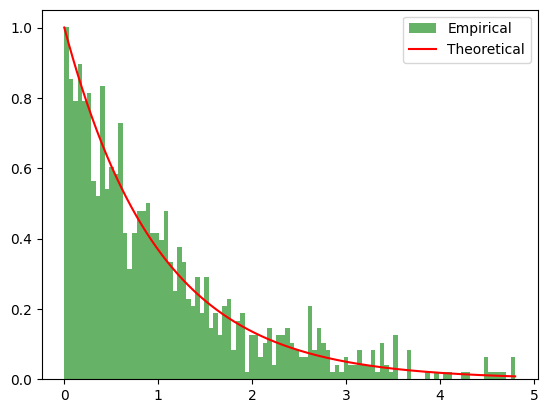

In [120]:
empirical_theoretical_overlay(partial(inverse_exponential, lamb=1), partial(exponential_distribution, lamb=1), 1000)

In [195]:
f = partial(inverse_exponential, lamb=1)
g = partial(exponential_distribution, lamb=1)
empirical_theoretical_chisquared(f, g, number_samples = 1000, number_bins = 100)

0.09971517833123004

In [25]:
bins = np.linspace(0, max(X), 100)
hist, _ = np.histogram(X, bins)
middle_points = (bins[1:] + bins[:-1]) / 2
middle_points
mse = np.mean((hist - np.exp(-middle_points))**2)
print(mse)

372.39822164223335


In [165]:
# small monte charlo integral approximation 
a = 0
b = 2/3
n = 10000
X = np.random.uniform(a, b, n)
Y = -(9/2)*X+3
approx_area = np.sum(Y)*(b-a)/n
approx_area


1.0020159636008763

In [201]:
n = 100
p = 0.5
f = partial(inverse_binomial, n=n, p=p)
g = partial(binomial_distribution, n=n, p=p)
empirical_theoretical_chisquared(f, g, number_samples = 1000, number_bins = 100)

/var/folders/4h/m4cl822x663crm6w17f4x4fh0000gn/T/ipykernel_38692/723149869.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.comb(n, k) * p**k * (1-p)**(n-k)


TypeError: only integer scalar arrays can be converted to a scalar index